In [3]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [4]:
# importing the cleaned dataset
imploded_df = pd.read_csv('../data/processed/cleaned_data_imploded.csv')

In [5]:
# one hot encoding
unique_genres = set()
for genres in imploded_df['track_genre'].str.split(','):
    unique_genres.update(genres)

for genre in unique_genres:
    encoded_genre = genre.replace(' ', '_')
    encoded_genre = ''.join(e for e in encoded_genre if e.isalnum() or e == '_')
    imploded_df[encoded_genre] = imploded_df['track_genre'].str.contains(genre).astype(int)

imploded_df.drop(columns=['track_genre'], inplace=True)

In [6]:
imploded_df

,track_id,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,...,anime,reggae,sad,classical,deathmetal,hardcore,groove,powerpop,dance,dub
0,0000vdREvCVMxbQTkS888c,44,160.725,1,0.910,0.37400,8,-9.844,0,0.1990,...,0,0,0,0,0,0,0,0,0,0
1,000CC8EParg64OmTxVnZ0p,47,322.933,0,0.269,0.51600,0,-7.361,1,0.0366,...,0,0,0,0,0,0,0,0,0,0
2,000Iz0K615UepwSJ5z2RE5,22,515.360,0,0.686,0.56000,5,-13.264,0,0.0462,...,0,0,0,0,0,0,0,0,0,0
3,000RDCYioLteXcutOjeweY,62,190.203,0,0.679,0.77000,0,-3.537,1,0.1900,...,0,0,0,0,0,0,0,0,0,0
4,000qpdoc97IMTBvF8gwcpy,19,331.240,0,0.519,0.43100,6,-13.606,0,0.0291,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88890,7zxHiMmVLt4LGWpOMqOpUh,56,325.156,0,0.766,0.38200,7,-11.464,0,0.0324,...,0,0,0,0,0,0,0,0,0,0
88891,7zxpdh3EqMq2JCkOI0EqcG,23,109.573,0,0.529,0.00879,10,-32.266,1,0.0587,...,0,0,0,0,0,0,0,0,0,0
88892,7zyYmIdjqqiX6kLryb7QBx,61,260.573,0,0.423,0.36000,3,-9.458,1,0.0372,...,0,0,0,0,0,0,0,0,0,0
88893,7zybSU9tFO9HNlwmGF7stc,54,234.300,0,0.649,0.83400,10,-11.430,0,0.0397,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# split train and test
X = imploded_df.drop(columns=['danceability'])
y = imploded_df['danceability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_ids = X_train['track_id'].values
test_ids = X_test['track_id'].values

X_train = X_train.drop(columns=['track_id'])
X_test = X_test.drop(columns=['track_id'])


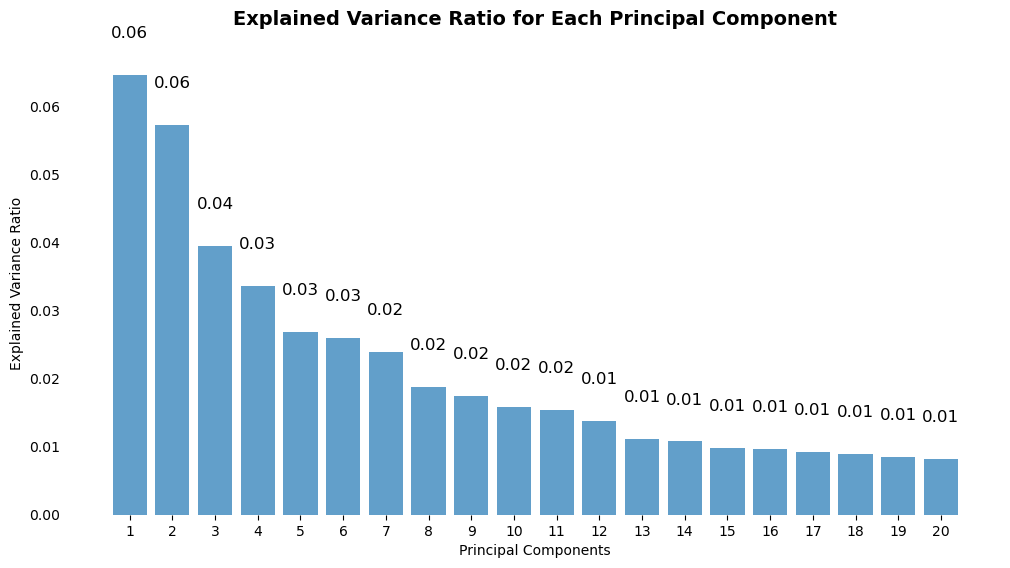

In [9]:
X_train_unchanged = X_train.iloc[:,0:14]
X_test_unchanged = X_test.iloc[:,0:14]
X_train_selected = X_train.iloc[:,14:]
X_test_selected = X_test.iloc[:,14:]

pca = PCA(n_components=20)
X_train_selected_pca = pca.fit_transform(X_train_selected)
X_test_selected_pca = pca.transform(X_test_selected)

X_train_combined = np.concatenate((X_train_selected_pca, X_train_unchanged), axis=1)
X_test_combined = np.concatenate((X_test_selected_pca, X_test_unchanged), axis=1)

explained_variance_ratio = pca.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')

for bar, ratio in zip(bars, explained_variance_ratio):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005,
        f'{ratio:.2f}',
        ha='center',
        va='bottom',
        fontsize=12
    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False)

# Remove gridlines
ax.grid(False)

# Set x-ticks incrementally
ax.set_xticks(range(1, len(explained_variance_ratio) + 1))

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component', fontsize=14, fontweight='bold', pad=20)
plt.show()


From the above graph, it appears that all the principal components contribute to explaining the variance in the data. Therefore, I have decided not to proceed with PCA and will retain all the original one-hot encoded variables for further analysis.